In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
datos = pd.read_excel('sample_data/etiquetado.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [19]:
codificador = LabelEncoder()
registros = datos.iloc[:, [0, 1, 2, 4, 5]]
columna_etiquetas = datos.iloc[:, 22]

In [20]:

for columna in registros.columns:
    registros[columna] = codificador.fit_transform(registros[columna].astype(str))

etiquetas = columna_etiquetas.values

for i in range(len(etiquetas)):
  if etiquetas[i] == 3:
    etiquetas[i]=0

conjunto_entrenamiento, conjunto_testeo, etiquetas_entrenamiento, etiquetas_testeo = train_test_split(registros, etiquetas, test_size=0.2, random_state=42)

conjunto_entrenamiento = pd.DataFrame(conjunto_entrenamiento, columns=registros.columns)
conjunto_testeo = pd.DataFrame(conjunto_testeo, columns=registros.columns)
etiquetas_entrenamiento = pd.DataFrame(etiquetas_entrenamiento, columns=['etiqueta'])
etiquetas_testeo = pd.DataFrame(etiquetas_testeo, columns=['etiqueta'])


etiquetas_entrenamiento=etiquetas_entrenamiento.values


<ipython-input-20-b5ad4a0a5458>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros[columna] = codificador.fit_transform(registros[columna].astype(str))
<ipython-input-20-b5ad4a0a5458>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros[columna] = codificador.fit_transform(registros[columna].astype(str))
<ipython-input-20-b5ad4a0a5458>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [21]:


etiquetas_testeo=etiquetas_testeo.values

def activacion(pesos, caracteristicas, bios):
    sumatoria_pesos_caracteristicas = np.dot(pesos, caracteristicas)
    if sumatoria_pesos_caracteristicas + bios > 0:
        return 1
    else:
        return 0

pesos = np.zeros(registros.shape[1])
bios = 1
tasa_de_aprendizaje = 0.01
epocas = 200

error_promedio_entrenamiento=0

for epoca in range(epocas):
    error_epoca = 0
    for i in range(conjunto_entrenamiento.shape[0]):
        prediccion = activacion(pesos, conjunto_entrenamiento.iloc[i], bios)
        error = etiquetas_entrenamiento[i] - prediccion
        error_epoca += error ** 2
        for j in range(len(pesos)):
            pesos[j] += tasa_de_aprendizaje * conjunto_entrenamiento.iloc[i, j] * error
        bios += tasa_de_aprendizaje * error
    error_promedio_entrenamiento+=error_epoca/conjunto_entrenamiento.shape[0]
    print("Error de la Época " + str(epoca) + "=" + str((error_epoca / conjunto_entrenamiento.shape[0]) * 100) + "%")

print("Error de Entrenamiento del perceptrón =" + str((error_promedio_entrenamiento/epocas)*100) + "%")
print("Exactitud de Entrenamiento del perceptrón =" + str((1 - error_promedio_entrenamiento/epocas) * 100) + "%")


<ipython-input-21-c9ca2fab181e>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pesos[j] += tasa_de_aprendizaje * conjunto_entrenamiento.iloc[i, j] * error


Error de la Época 0=[15.36589507]%
Error de la Época 1=[13.66800611]%
Error de la Época 2=[13.20957609]%
Error de la Época 3=[12.9265946]%
Error de la Época 4=[12.85867904]%
Error de la Época 5=[12.63229385]%
Error de la Época 6=[12.64927274]%
Error de la Época 7=[12.6039957]%
Error de la Época 8=[12.40590865]%
Error de la Época 9=[12.5473994]%
Error de la Época 10=[12.34365273]%
Error de la Época 11=[12.43986643]%
Error de la Época 12=[12.30403532]%
Error de la Época 13=[12.51344162]%
Error de la Época 14=[12.41722791]%
Error de la Época 15=[12.32667384]%
Error de la Época 16=[12.45118569]%
Error de la Época 17=[12.41722791]%
Error de la Época 18=[12.36063161]%
Error de la Época 19=[12.31535458]%
Error de la Época 20=[12.47382421]%
Error de la Época 21=[12.13990605]%
Error de la Época 22=[12.15122531]%
Error de la Época 23=[12.44552606]%
Error de la Época 24=[12.15688494]%
Error de la Época 25=[12.41156828]%
Error de la Época 26=[12.0550116]%
Error de la Época 27=[12.13424642]%
Error 

Error de Testeo del Perceptrón =16.02535083748302%
Exactitud de Testeo del Perceptrón:83.97464916251698%
Intervalo de Confianza de 2:  (0.8287083741448779, 0.8507846091054617)


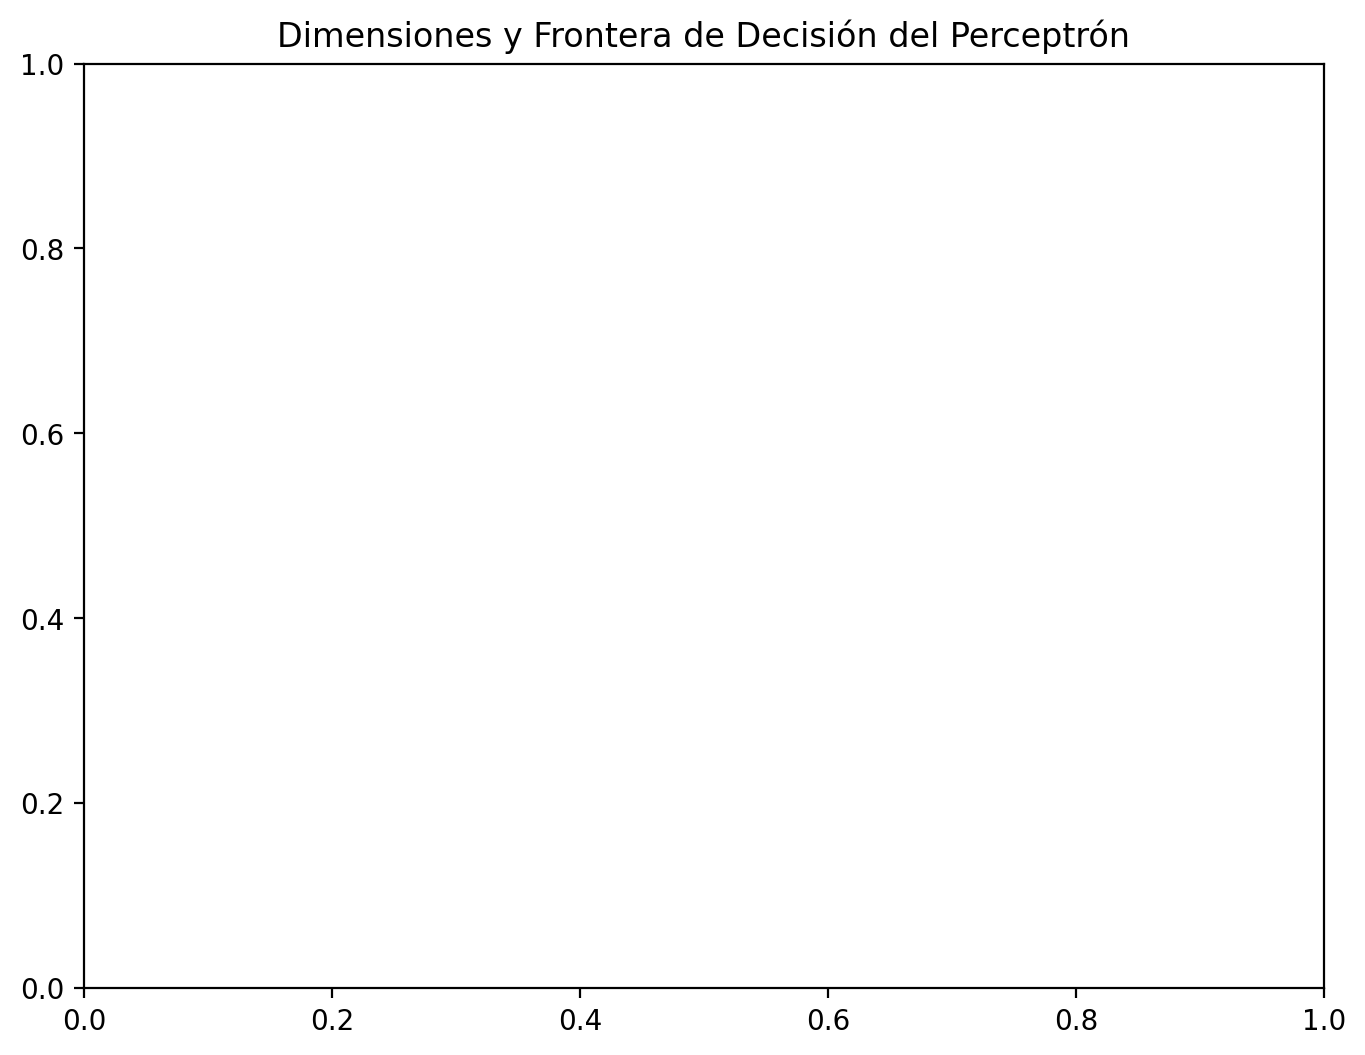

In [22]:

aciertos = 0
for i in range(len(conjunto_testeo)):
    etiqueta_predicha = activacion(pesos, conjunto_testeo.iloc[i], bios)
    if etiqueta_predicha == etiquetas_testeo[i]:
        aciertos += 1

exactitud = aciertos / len(conjunto_testeo)
error_testeo = 1 - exactitud

valor_critico = 2
intervalo_confianza = valor_critico * np.sqrt((exactitud * (1 - exactitud)) / len(conjunto_testeo))

print("Error de Testeo del Perceptrón =" + str(error_testeo * 100) + "%")
print("Exactitud de Testeo del Perceptrón:" + str(exactitud * 100) + "%")
print("Intervalo de Confianza de " + str(valor_critico) + ": ", (exactitud - intervalo_confianza, exactitud + intervalo_confianza))

columnas_relevantes = ['nombreComercial', 'tipoNegocio', 'codigoAgente', 'nombreArticulo', 'nombreCategoria']
datos_relevantes = registros[columnas_relevantes]

datos_normalizados = StandardScaler().fit_transform(datos_relevantes)

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datos_normalizados)

datos_bidimensional = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])
datos_bidimensional['Etiqueta'] = etiquetas


plt.figure(figsize=(8, 6), dpi=200)
plt.title("Dimensiones y Frontera de Decisión del Perceptrón")

pesos_originales = np.linalg.inv(registros.T @ registros) @ registros.T @ etiquetas
pesos_pca = pca.components_.T @ pesos[2:4]

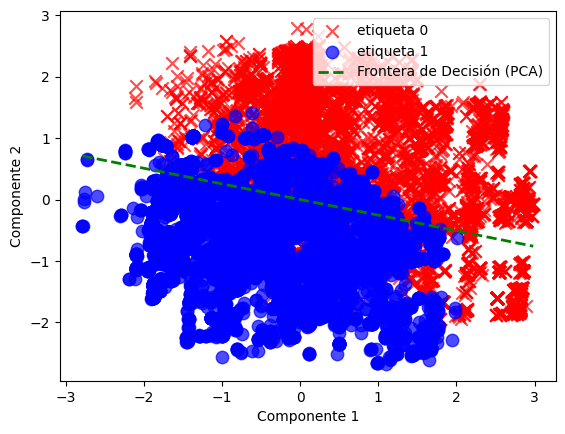

In [23]:

x_min_pca = datos_bidimensional['Componente 1'].min()
x_max_pca = datos_bidimensional['Componente 1'].max()
y_min_pca = ( (-(pesos_pca[0] * x_min_pca) - pesos_originales[0]) / pesos_pca[1] )
y_max_pca = ( (-(pesos_pca[0] * x_max_pca) - pesos_originales[0]) / pesos_pca[1] )

plt.scatter(datos_bidimensional[datos_bidimensional['Etiqueta'] == 0]['Componente 1'],
            datos_bidimensional[datos_bidimensional['Etiqueta'] == 0]['Componente 2'],
            marker="x", s=80, color="red", label="etiqueta 0",alpha=0.7)

plt.scatter(datos_bidimensional[datos_bidimensional['Etiqueta'] == 1]['Componente 1'],
            datos_bidimensional[datos_bidimensional['Etiqueta'] == 1]['Componente 2'],
            marker="o", s=80, color="blue", label="etiqueta 1",alpha=0.7)

plt.plot([x_min_pca, x_max_pca], [y_min_pca, y_max_pca], color='green', linestyle='--', linewidth=2, label='Frontera de Decisión (PCA)')

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()